In [33]:
import numpy as np
import matplotlib.pyplot as plt

from waveform import *

colors = ["blue", "darkviolet", "crimson", "orangered", "orange",
          "forestgreen", "lightseagreen", "dodgerblue"]
color_index = 0

def plot(waves):
    global colors, color_index
    
    if not isinstance(waves, list):
        waves = [waves]
    
    for wave in waves:
        raw = wave.direct_sample(50, 1)
        plt.plot(raw, color=colors[color_index%len(colors)])
        color_index += 1
    plt.show()
    
    
def plot_complex(wave):
    raw = wave.direct_sample(50, 1)
    plt.plot(raw.real, color='b')
    plt.plot(raw.imag, color='r')
    plt.show()

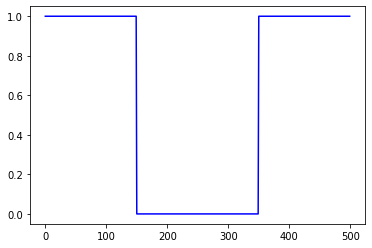

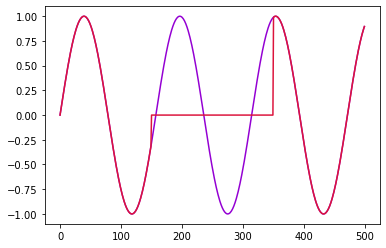

In [34]:
sin_wave = Sin(10, 1, 2, 0)
gate_wave = DC(3, 1).concat(Blank(4)).concat(DC(3, 1))

gated = sin_wave * gate_wave

plot(gate_wave)
plot([sin_wave, gated])

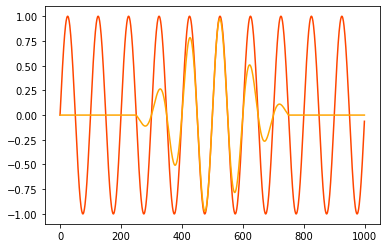

In [35]:
blank_wave = Blank(5)
sin_wave = Sin(20, 1, np.pi, 0)
gaussian_env = blank_wave.concat(Gaussian(10, 1)).concat(blank_wave)
seq_wave = gaussian_env * sin_wave

plot([sin_wave, seq_wave])

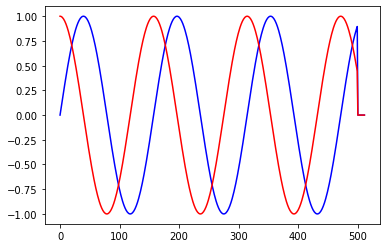

In [19]:
sin_wave = Sin(10, 1, 2, 0)
cos_wave = Cos(10, 1, 2, 0) * 1j

sum_wave = SumWave(sin_wave, cos_wave)

plot_complex(sum_wave)